2025-07-30 01:02:41,128 - INFO - Loaded user taste vectors: (12080, 302)
/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
2025-07-30 01:03:02,864 - INFO - Completed KMeans clustering with k=5
/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gnaneshreddysaireddy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

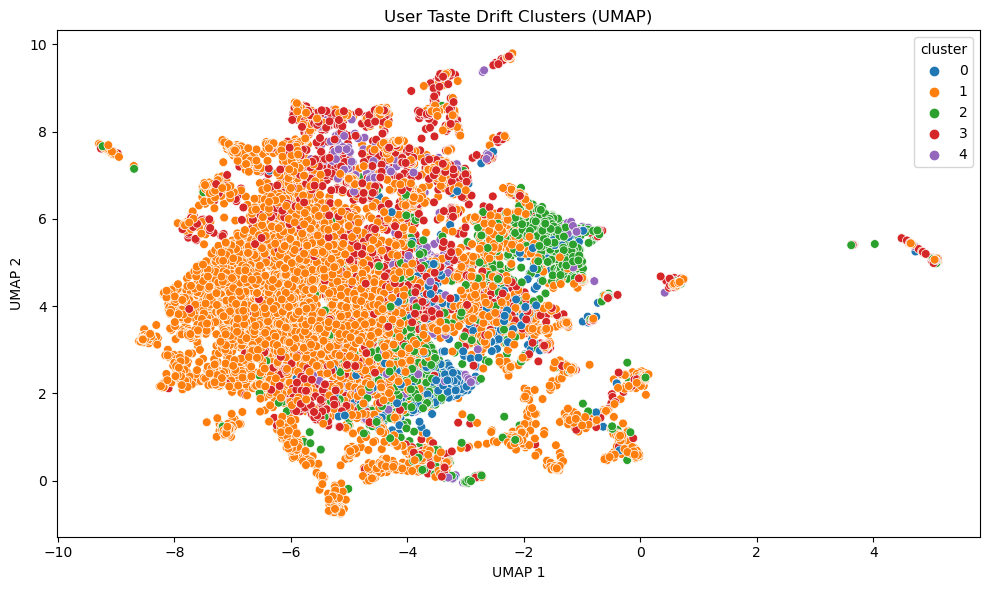

2025-07-30 01:03:03,482 - INFO - Saved user clusters to: /Users/gnaneshreddysaireddy/TasteDrift-MovieLens/data/processed/user_clusters.csv


In [1]:
# taste_drift_pipeline/notebooks/03_modeling.ipynb

# --- Notebook 3: ML Modeling & Clustering ---

import pandas as pd
import numpy as np
import logging
from pathlib import Path
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Setup project path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Configure logging
log_dir = project_root / "logs"
log_dir.mkdir(exist_ok=True)
log_file = log_dir / "modeling.log"
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler(log_file),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

# Load data
input_path = project_root / "data/processed/user_taste_vectors.csv"
df_vectors = pd.read_csv(input_path, index_col=0)
logger.info(f"Loaded user taste vectors: {df_vectors.shape}")

# Normalize features
scaler = StandardScaler()
X_features = df_vectors.select_dtypes(include=[np.number])
X_features_clean = X_features.replace([np.inf, -np.inf], np.nan).dropna()
X_scaled = scaler.fit_transform(X_features_clean)

# Dimensionality reduction for visualization
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# KMeans clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df_vectors['cluster'] = kmeans.fit_predict(X_scaled)
logger.info(f"Completed KMeans clustering with k={k}")

# Plot clusters in UMAP space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=df_vectors['cluster'], palette='tab10', s=40)
plt.title("User Taste Drift Clusters (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.tight_layout()
plt.show()

# Save cluster assignments
df_vectors_out = project_root / "data/processed/user_clusters.csv"
df_vectors[['cluster']].to_csv(df_vectors_out)
logger.info(f"Saved user clusters to: {df_vectors_out}")
